# **Gender Classification Model V.2**

Model deep learning yang bertujuan untuk mengklasifikasikan gender dengan mendeteksi wajah.<br>
Model ini diperuntukkan untuk aplikasi Face Count (aplikasi penghitung peserta berdasarkan gender), dengan tujuan utama memangkas waktu dan kebutuhan sumber daya manusia untuk menghitung jumlah peserta dalam suatu acara.

## **Import Library**

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

2024-12-07 14:47:10.911265: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-07 14:47:10.925046: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733557630.938095   69983 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733557630.941272   69983 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-07 14:47:10.963105: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## **Load Datasets**

In [ ]:
path = "datasets/"
train_path = os.path.join(path, "Training/")
val_path = os.path.join(path, "Validation/")

## **Augmentating Datasets**

Implementasi augmentasi gambar agar 1 gambar bisa memiliki banyak varian yang nantinya akan berefek ke proses training model.

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=30,
    brightness_range=[0.8, 1.2],
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

## **Making Train And Validation Set**

In [5]:
train_set = train_datagen.flow_from_directory(
    train_path,
    target_size = (150, 150),
    batch_size = 64,
    class_mode = 'categorical'
)

val_set = val_datagen.flow_from_directory(
    val_path,
    target_size = (150, 150)
)

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


## **Making Model**

Membuat model sequential dengan 4 hidden layers dan 1 output layers.

In [6]:
model = Sequential(
    [
        Conv2D(32, kernel_size=(5,5), activation="relu", input_shape=(150,150,3)),
        MaxPooling2D(3,3),

        Conv2D(64, kernel_size=(4,4), activation="relu"),
        MaxPooling2D(2,2),

        Conv2D(128, kernel_size=(3,3), activation="relu"),
        MaxPooling2D(2,2),

        Conv2D(256, kernel_size=(3,3), activation="relu"),
        MaxPooling2D(2,2),

        Flatten(),
        Dense(128, activation="relu"),
        Dense(2, activation="sigmoid")
    ]
)

/home/chocomalt/tfgpu/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1733479713.000231    1283 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 146, 146, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 45, 45, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 928,962 (3.54 MB)

 Trainable params: 928,962 (3.54 MB)

 Non-trainable params: 0 (0.00 B)

## **Compiling Model**

In [8]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.0001),
    metrics=['accuracy']
)

## **Training Model**

In [46]:
history=model.fit(
            train_set,
            validation_data=val_set,
            epochs=50,
        )

/home/chocomalt/tfgpu/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
735/735 ━━━━━━━━━━━━━━━━━━━━ 157s 198ms/step - accuracy: 0.6957 - loss: 0.5336 - val_accuracy: 0.9259 - val_loss: 0.2011
Epoch 2/50
735/735 ━━━━━━━━━━━━━━━━━━━━ 120s 163ms/step - accuracy: 0.9144 - loss: 0.2318 - val_accuracy: 0.9421 - val_loss: 0.1546
Epoch 3/50
735/735 ━━━━━━━━━━━━━━━━━━━━ 119s 162ms/step - accuracy: 0.9310 - loss: 0.1894 - val_accuracy: 0.9512 - val_loss: 0.1329
Epoch 4/50
735/735 ━━━━━━━━━━━━━━━━━━━━ 119s 162ms/step - accuracy: 0.9409 - loss: 0.1672 - val_accuracy: 0.9520 - val_loss: 0.1317
Epoch 5/50
735/735 ━━━━━━━━━━━━━━━━━━━━ 119s 162ms/step - accuracy: 0.9455 - loss: 0.1525 - val_accuracy: 0.9463 - val_loss: 0.1379
Epoch 6/50
735/735 ━━━━━━━━━━━━━━━━━━━━ 118s 161ms/step - accuracy: 0.9489 - loss: 0.1410 - val_accuracy: 0.9557 - val_loss: 0.1192
Epoch 7/50
735/735 ━━━━━━━━━━━━━━━━━━━━ 118s 161ms/step - accuracy: 0.9531 - loss: 0.1351 - val_accuracy: 0.9603 - val_loss: 0.1055
Epoch 8/50
735/735 ━━━━━━━━━━━━━━━━━━━━ 120s 163ms/step - accuracy: 0.9547 -

## **Visualizing Loss And Accuracy**

Menampilkan hasil akurasi dan loss dari data training dan data validasi.

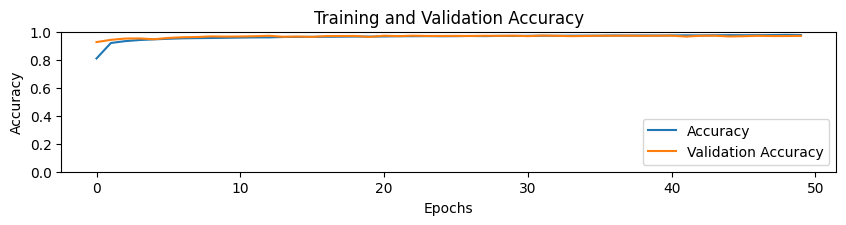

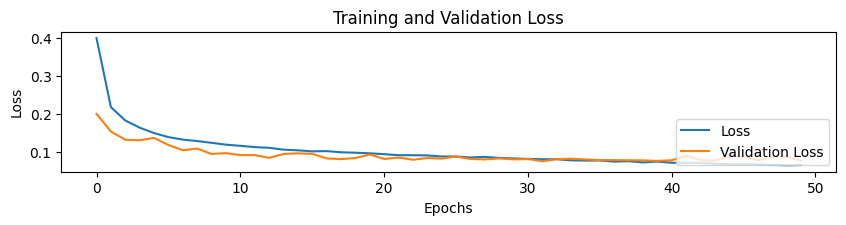

In [47]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(10,4))
ax = plt.subplot(2, 1, 1)
ax.plot(accuracy, label="Accuracy")
ax.plot(val_accuracy, label="Validation Accuracy")
ax.legend(loc="lower right")
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.set_title("Training and Validation Accuracy")
ax.set_ylim([0,1])

plt.show()

plt.figure(figsize=(22,4))
ax = plt.subplot(2, 2, 1)
ax.plot(loss, label="Loss")
ax.plot(val_loss, label="Validation Loss")
ax.legend(loc="lower right")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Training and Validation Loss")
plt.show()

## **Evaluating Model**

Mengevaluasi performa model, terlihat bahwa model memiliki akurasi dan loss yang sangat baik, tidak menunjukkan adanya overfitting maupun underfitting.

In [48]:
loss_train, acc_train = model.evaluate(train_set)
loss_val, acc_val = model.evaluate(val_set)
print("===========================================")
print("Train Accuracy: {:.2f}".format(acc_train))
print("Train Loss: {:.2f}".format(loss_train))
print("===========================================")
print("Validation Accuracy: {:.2f}".format(acc_val))
print("Validation Loss: {:.2f}".format(loss_val))
print("===========================================")

735/735 ━━━━━━━━━━━━━━━━━━━━ 119s 160ms/step - accuracy: 0.9785 - loss: 0.0597
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9728 - loss: 0.0718
Train Accuracy: 0.98
Train Loss: 0.06
Validation Accuracy: 0.97
Validation Loss: 0.08


Confussion matrix menunjukkan model lebih mudah untuk menghasilkan prediksi benar untuk kedua gender.

365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


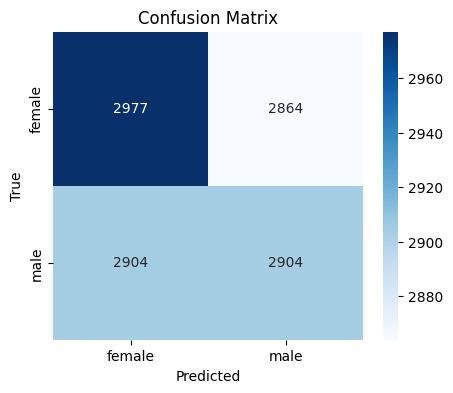

              precision    recall  f1-score   support

      female       0.51      0.51      0.51      5841
        male       0.50      0.50      0.50      5808

    accuracy                           0.50     11649
   macro avg       0.50      0.50      0.50     11649
weighted avg       0.50      0.50      0.50     11649



In [66]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


y_pred = model.predict(val_set)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_set.classes

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_set.class_indices.keys(), yticklabels=val_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=val_set.class_indices.keys()))

## **Checking Model**

In [17]:
import cv2

male = 0
female = 0
def checking(img):
    label = {0:"female",1:"male"}
    image =cv2.imread(img)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    cascade = cv2.CascadeClassifier("datasets/Input/haarcascade_frontalface_default.xml")
    faces = cascade.detectMultiScale(gray,1.1,7)#1.1
    global male
    global female
    
    for x,y,w,h in faces:
        face = image[y:y+h,x:x+w]
        face = cv2.resize(face,(150,150))
        img_scaled = face/255.0
        reshape = np.reshape(img_scaled,(1,150,150,3))
        img = np.vstack([reshape])
        result = model.predict(img)
        
        predicted_class = np.argmax(result, axis=1)[0]
        if predicted_class == 0:
            cv2.rectangle(image,(x-10,y),(x+w,y+h),(0,255,0),4)
            cv2.rectangle(image,(x-10,y-50),(x+w,y),(255,0,0),-1)
            cv2.putText(image,label[0],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),2)
            female = female + 1
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            plt.imshow(image)                
                
        elif predicted_class == 1:
            cv2.rectangle(image,(x-10,y),(x+w,y+h),(0,255,0),4)
            cv2.rectangle(image,(x-10,y-50),(x+w,y),(255,0,0),-1)
            cv2.putText(image,label[1],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),2)
            male = male + 1
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            plt.imshow(image)            
    print(f"female: {female}")
    print(f"male: {male}")
    plt.show()
    cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
female: 1
male: 0


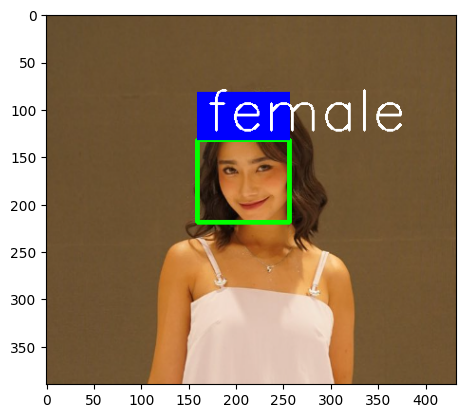

In [61]:
checking(os.path.join(path, 'Input/Screenshot 2024-11-21 132804.png'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
female: 1
male: 1


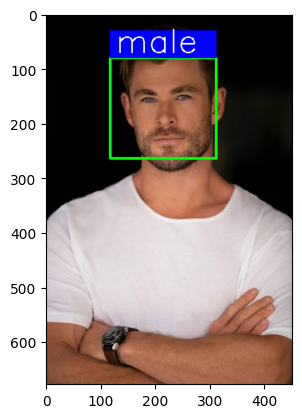

In [63]:
checking(os.path.join(path, "Input/images.jpg"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
female: 6
male: 6


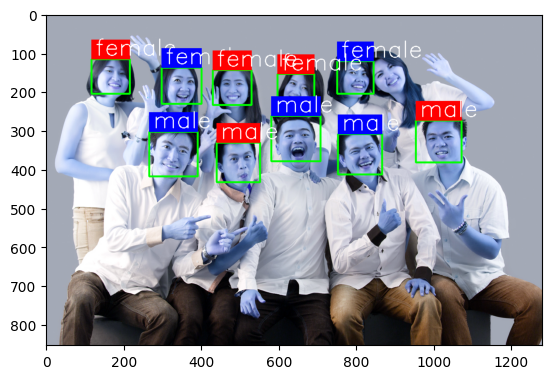

In [64]:
checking(os.path.join(path, "Input/group1.jpg"))

##### **English**<br>
Based on these pictures, the model can detect the gender very well with one person in frame.<br>
However when it comes to a group of people like the last picture, there's a chance that the model couldn't detect all person in frame (for this case, the women on the top left).<br>
It can be caused by some part of her face is obstructed by her friend besides her, or maybe because she tilt her head to the left even though this case is unlikely affect the model performance because the train dataset has already augmented.<br><hr>
##### **Indonesia**<br>
Berdasarkah hasil tes di atas, model ini bisa mendeteksi gender dengan sangat baik pada foto dengan satu orang di dalam frame.<br>
Akan tetapi, ketika dihadapkan dengan foto yang berisi banyak orang, ada kemungkinan model ini tidak bisa mendeteksi semua orang di dalam frame (dalam kasus ini, wanita yang berada di kanan atas).<br>
hal ini bisa terjadi akibat ada sedikit bagian wajahnya yang terhalangi oleh teman di sampingnya, atau mungkin karena dia memiringkan wajahnya ke kiri walaupun sebenarnya hal ini tidak terlalu mempengaruhi performa model karena train dataset sudah di augmentasi.<br>

## **Save Model**

In [53]:
model.save("saved_model/model_gender_final.h5")

In [4]:
model.save("saved_model/model_gender_final.keras")

## **Trying Real-Time Detection**

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

model = load_model("saved_model/model_gender_final.keras")
input_size = (128, 128)
face_cascade = cv2.CascadeClassifier("datasets/Input/haarcascade_frontalface_default.xml")

def preprocess_image(face):
    resized_face = cv2.resize(face, input_size)
    normalized_face = resized_face / 255.0
    input_face = np.expand_dims(normalized_face, axis=0)
    return input_face

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Tidak dapat mengakses kamera.")
    exit()

print("Tekan 'q' untuk keluar.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Tidak dapat membaca frame dari kamera.")
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=7)

    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]

        input_face = preprocess_image(face)
        prediction = model.predict(input_face)

        predicted_class = np.argmax(prediction, axis=1)[0]
        confidence = np.max(prediction)

        label = f"Class: {'Male' if predicted_class == 1 else 'Female'}, Confidence: {confidence:.2f}"
        
        color = (0, 255, 0) if predicted_class == 0 else (0, 0, 255)
        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

    cv2.imshow("Live Camera Feed", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
